In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro.infer.kernels as kernels
from numpyro.infer.kernels import SteinKernel
from numpyro.contrib.autoguide import AutoDelta
from numpyro.infer.util import init_with_noise
from numpyro.infer.stein import SVGD
from numpyro.distributions import NormalMixture
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(42)
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

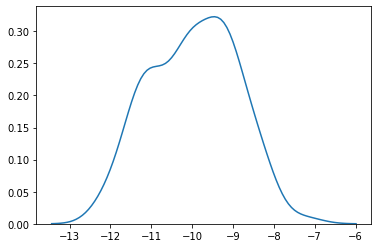

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.056: 100%|██████████| 1500/1500 [00:06<00:00, 217.83it/s]


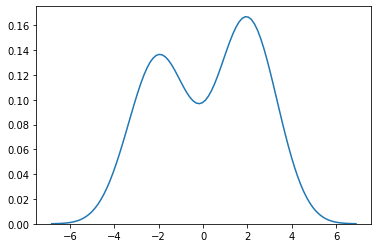

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([-0.01721275, -0.49380615,  1.2356281 , -3.109957  ,
             -2.65761   ,  0.53842276,  2.7060144 , -3.604849  ,
              1.8777758 ,  1.5650961 ,  2.516641  ,  1.8846455 ,
              2.3381026 ,  1.460351  ,  2.1209073 ,  1.747838  ,
             -2.3583531 ,  3.7030582 , -1.6707247 ,  3.390187  ,
              0.89472336, -0.01908867, -0.75869244,  2.1370919 ,
             -2.2491345 , -0.75305593,  1.5864594 ,  1.7961248 ,
              1.3185469 , -1.5935371 , -0.58329624,  2.452327  ,
              1.9259887 ,  1.1430581 , -2.250708  , -3.7438097 ,
              2.617384  , -1.7793787 ,  1.9863571 , -1.1734612 ,
             -1.6814679 ,  0.65714127, -1.9854921 ,  3.8113112 ,
              2.9847057 , -2.706535  ,  2.7098327 ,  2.3974292 ,
              2.3079543 , -1.1319157 , -0.95343643,  2.2867692 ,
             -2.4612517 ,  3.030523  , -1.1107515 , -2.779678  ,
              1.6902883 , -1.2755678 ,  3.440239  , -2.2704725 ,
              2.8552096 ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.LinearKernel(), num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3079: 100%|██████████| 1500/1500 [00:03<00:00, 392.45it/s]


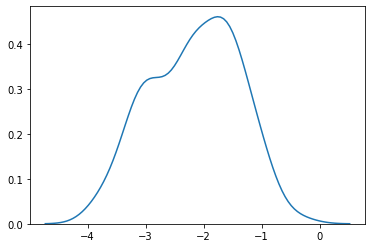

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [11]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RandomFeatureKernel(), num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations * 2)

SVGD 2.0058: 100%|██████████| 3000/3000 [00:26<00:00, 113.30it/s]


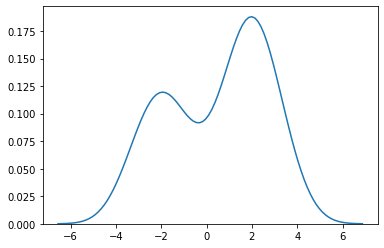

In [12]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [13]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.IMQKernel(), num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0929: 100%|██████████| 1500/1500 [00:04<00:00, 360.89it/s]


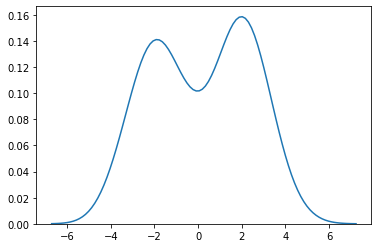

In [14]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [15]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.MixtureKernel([0.5, 0.5], [kernels.LinearKernel(), kernels.RandomFeatureKernel()]),
            num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3534: 100%|██████████| 1500/1500 [00:13<00:00, 107.97it/s]


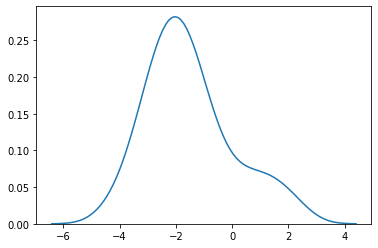

In [16]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])